# Optional Project
---
## Import pakcages

In [339]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import normalize
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

## Read the Datasets

In [340]:
excel_file = pd.ExcelFile('./Datasets.xlsx')
dataset_1_missing = pd.read_excel(excel_file, 'Dataset 1')
dataset_2_missing = pd.read_excel(excel_file, 'Dataset 2')

In [341]:
dataset_1_missing.head(5)

,Athlete,Team,League/Division,Season,Head Coach,Manager,A,AA,AB,B,...,WW,WX,X,XX,XY,Y,YY,YZ,Z,ZZ
0,1,36,5.0,1,7,13.0,85,90,90,85.775,...,95,90.0,95.0,90.0,95.0,88.385,NaN,83,90.0,NaN
1,2,50,5.0,1,7,13.0,95,92,95,85.635,...,95,84.0,87.0,84.0,95.0,88.385,NaN,85,90.0,NaN
2,3,41,5.0,1,7,13.0,85,85,85,85.425,...,95,NaN,NaN,NaN,95.0,88.385,85.0,90,90.0,NaN
3,4,60,1.0,1,10,29.0,90,80,90,88.000,...,95,85.0,85.0,85.0,93.0,89.385,70.0,95,90.0,95.0
4,5,22,1.0,1,10,29.0,90,90,85,87.300,...,95,70.0,65.0,85.0,93.0,89.385,90.0,82,85.0,93.0


In [342]:
dataset_2_missing.head(5)

,Athlete,Team,League/Division,Season,Head Coach,Manager,A,AA,AB,B,...,W,WW,WX,X,XX,Y,YY,YZ,Z,ZZ
0,1,36,1.0,2,23,12.0,100.0,100.0,83.0,85.0,...,90.0,90.0,84.81,100.0,90.0,90.0,85.0,80.0,95.0,90
1,2,50,1.0,2,23,12.0,100.0,0.0,95.0,95.0,...,82.0,85.0,93.10,100.0,95.0,80.0,95.0,95.0,82.0,90
2,3,41,1.0,2,23,12.0,0.0,100.0,NaN,NaN,...,NaN,NaN,84.06,100.0,NaN,NaN,NaN,NaN,NaN,85
3,5,22,1.0,2,27,13.0,100.0,0.0,90.0,90.0,...,70.0,80.0,91.52,0.0,90.0,80.0,92.0,90.0,80.0,95
4,6,6,1.0,2,27,13.0,100.0,0.0,NaN,NaN,...,NaN,NaN,85.85,0.0,NaN,NaN,NaN,NaN,NaN,88


# Part 1: Data Set 1 

Fill missing data in performance metrics (G to CM)

In [343]:
dataset_1 = dataset_1_missing.fillna(dataset_1_missing.mean()['A':'ZZ'])

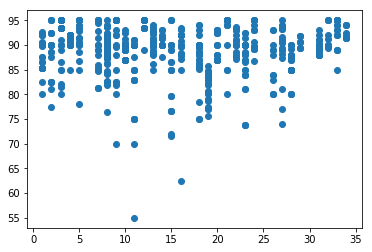

In [344]:
plt.scatter(dataset_1['Head Coach'], dataset_1['OO'])

## OO vs Head Coach

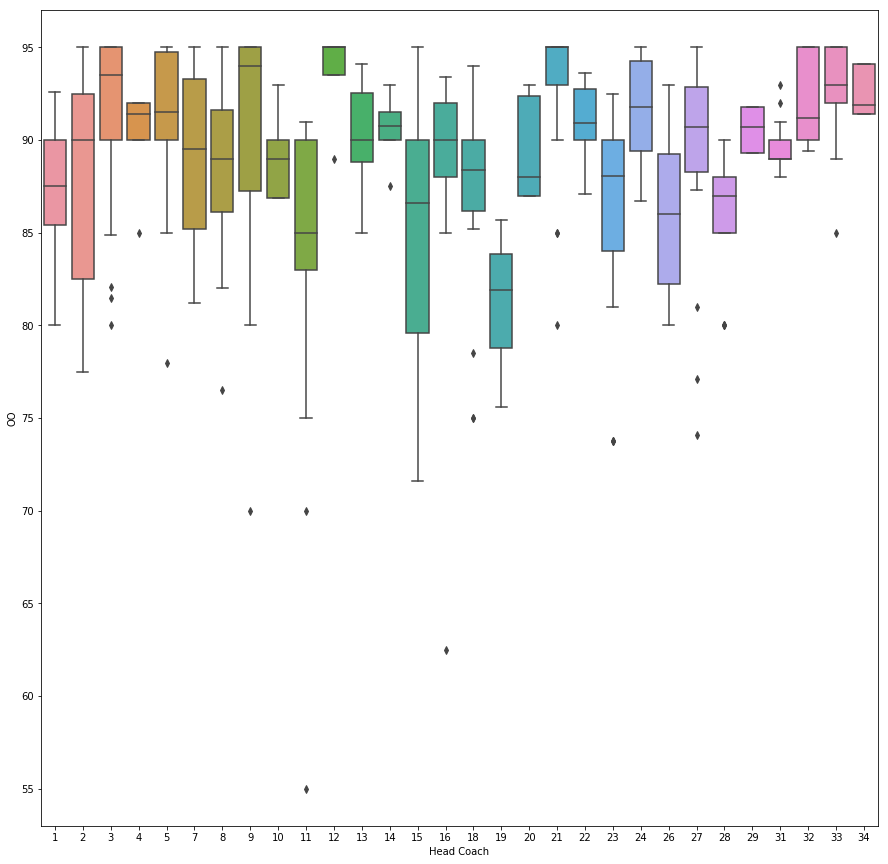

In [345]:
plt.figure(figsize=(15,15))
sns.boxplot(x='Head Coach', y='OO', data=dataset_1)
plt.show()

## S vs Manager

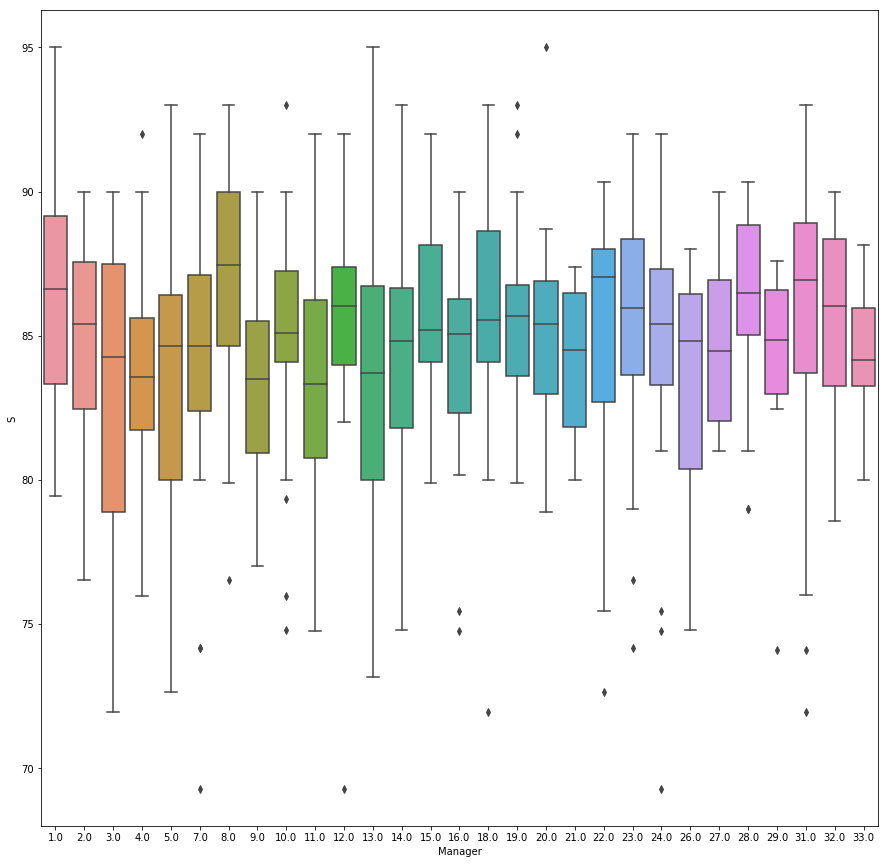

In [346]:
plt.figure(figsize=(15,15))
sns.boxplot(x='Manager', y='S', data=dataset_1)
plt.show()

## S vs Season

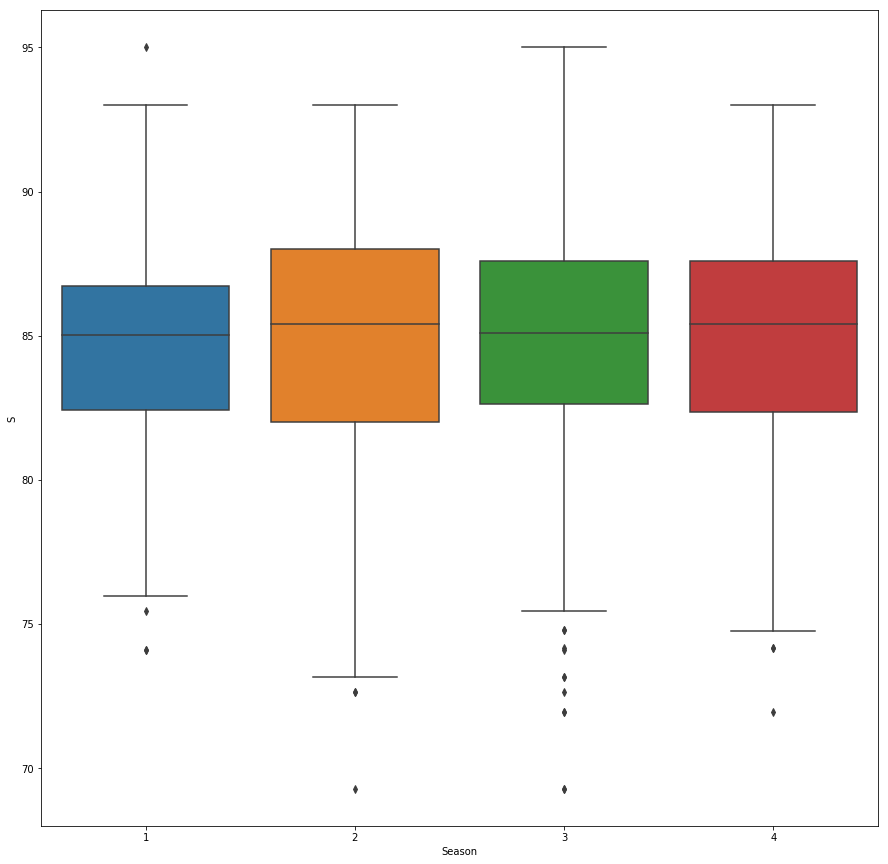

In [347]:
plt.figure(figsize=(15,15))
sns.boxplot(x='Season', y='S', data=dataset_1)
plt.show()

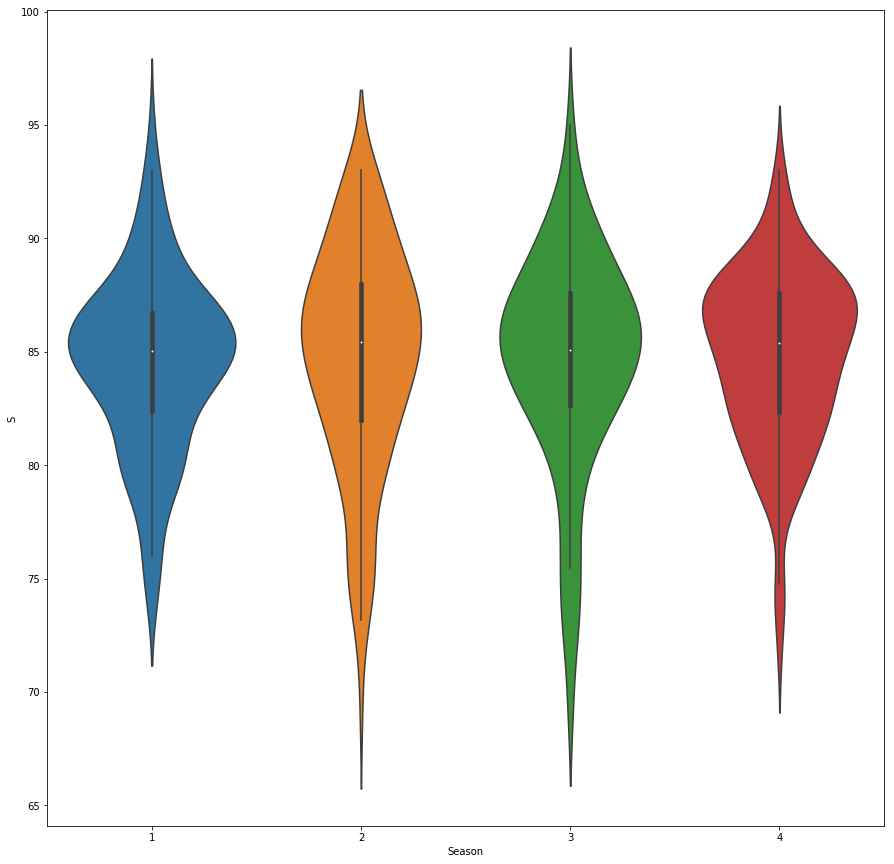

In [348]:
plt.figure(figsize=(15,15))
sns.violinplot(x='Season', y='S', data=dataset_1)
plt.show()

## R vs Head Coach

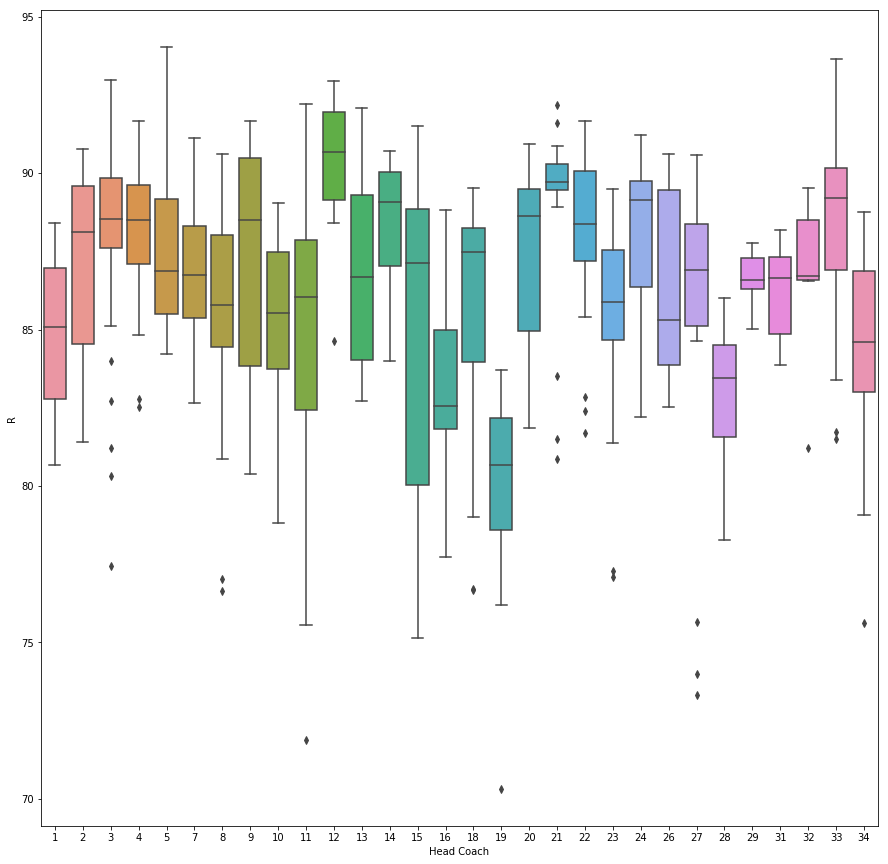

In [349]:
plt.figure(figsize=(15,15))
sns.boxplot(x='Head Coach', y='R', data=dataset_1)
plt.show()

## R vs Season

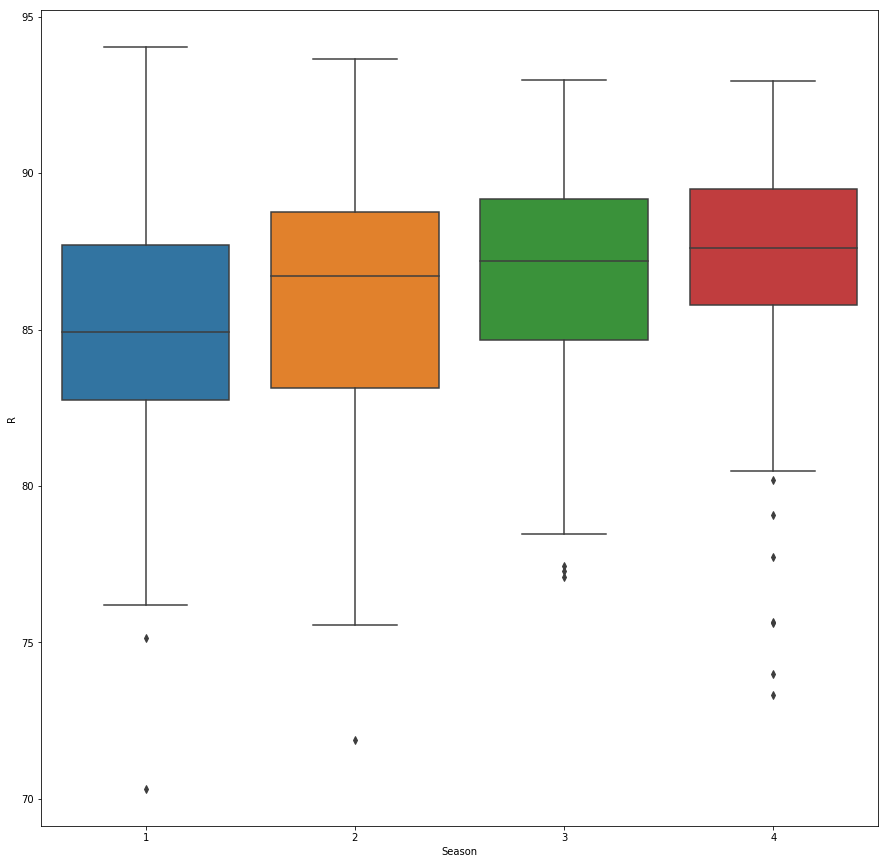

In [350]:
plt.figure(figsize=(15,15))
sns.boxplot(x='Season', y='R', data=dataset_1)
plt.show()

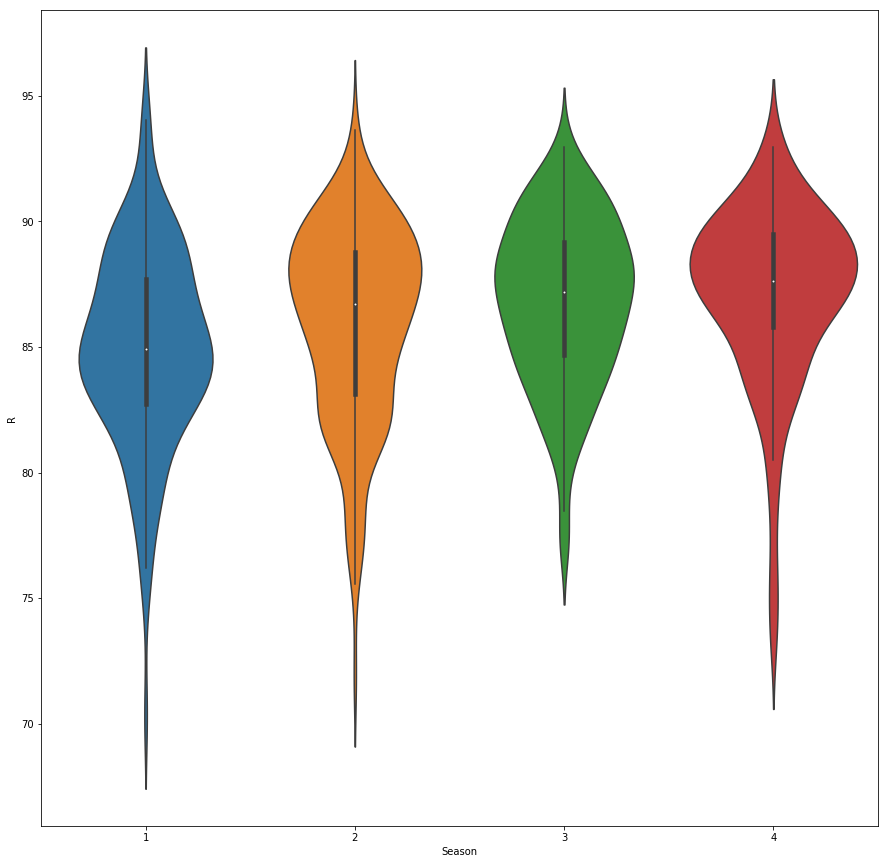

In [351]:
plt.figure(figsize=(15,15))
sns.violinplot(x='Season', y='R', data=dataset_1)
plt.show()

## NN vs OO

C:\Users\Danny\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


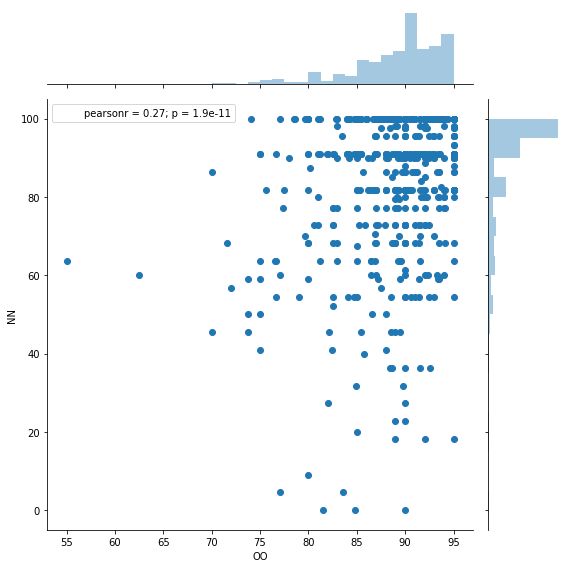

In [352]:
sns.jointplot(x='OO', y='NN', data=dataset_1, kind='scatter', size=8)

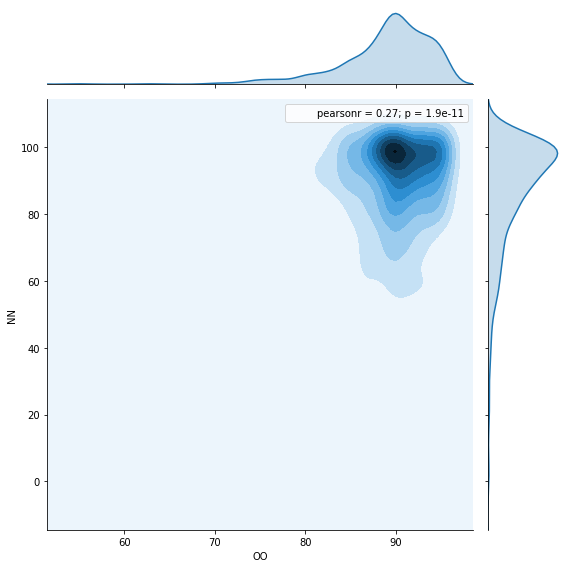

In [353]:
sns.jointplot(x='OO', y='NN', data=dataset_1, kind='kde', size=8)

## NN vs Season

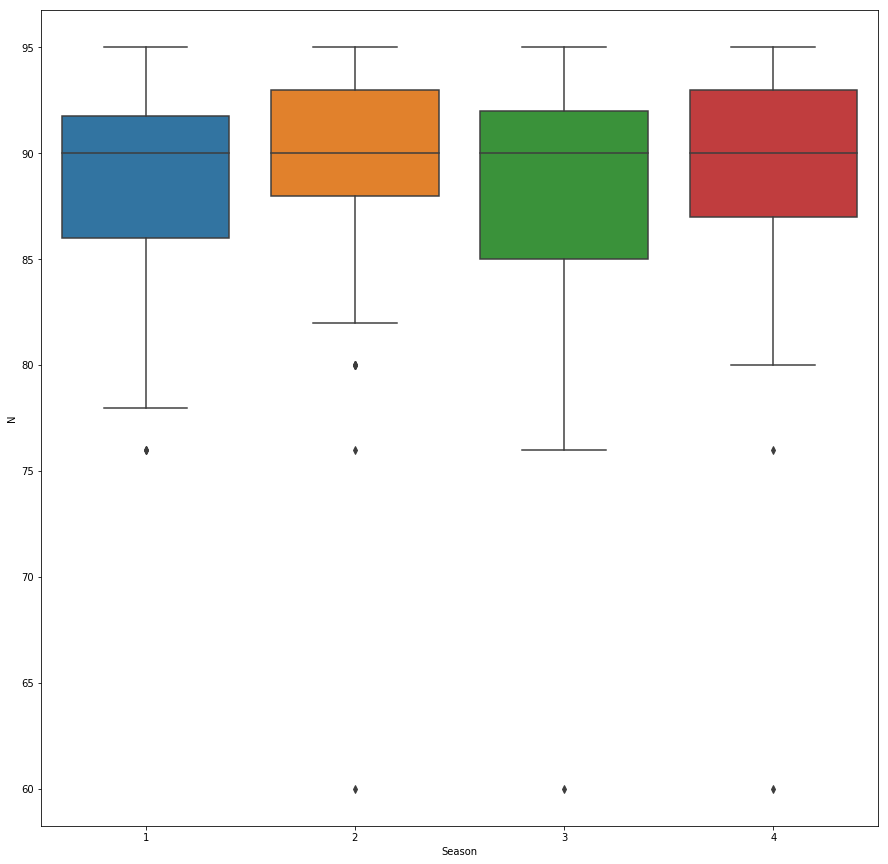

In [354]:
plt.figure(figsize=(15,15))
sns.boxplot(x='Season', y='N', data=dataset_1)
plt.show()

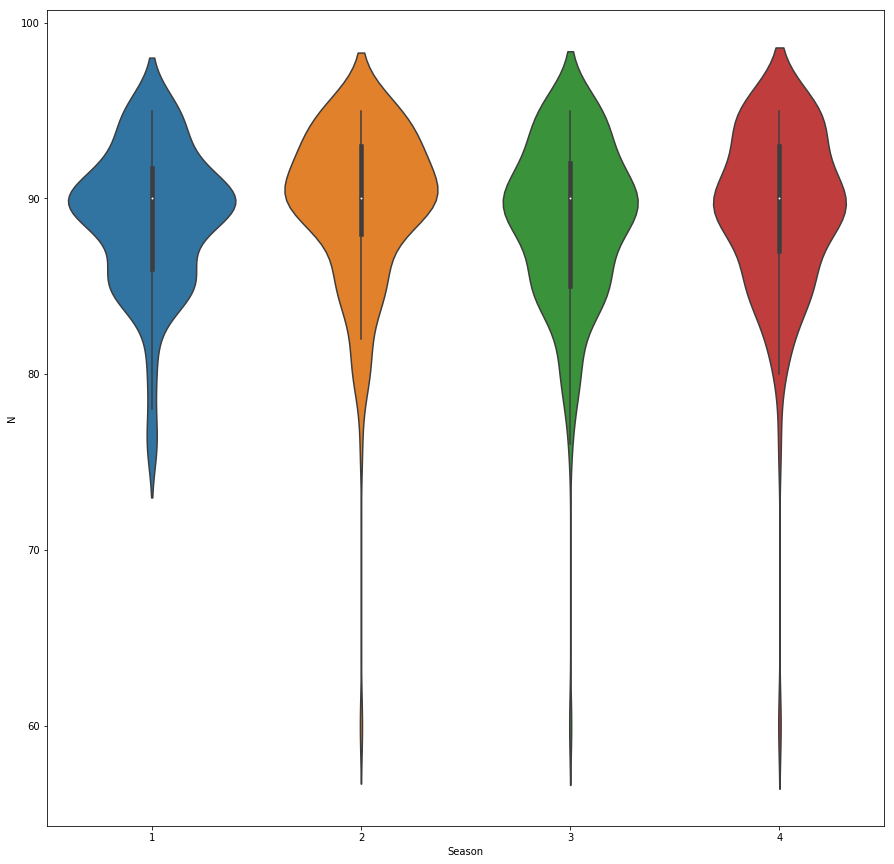

In [355]:
plt.figure(figsize=(15,15))
sns.violinplot(x='Season', y='N', data=dataset_1)
plt.show()

## OO vs JI

C:\Users\Danny\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


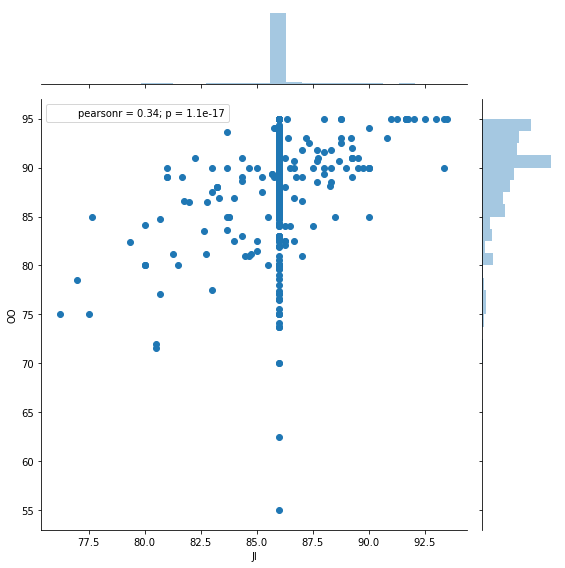

In [356]:
sns.jointplot(x='JI', y='OO', data=dataset_1, kind='scatter', size=8)

C:\Users\Danny\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


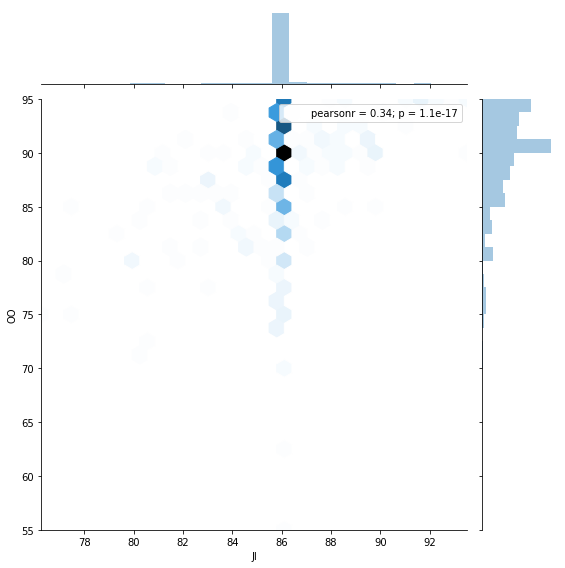

In [357]:
sns.jointplot(x='JI', y='OO', data=dataset_1, kind='hex', size=8)

## OO vs Season

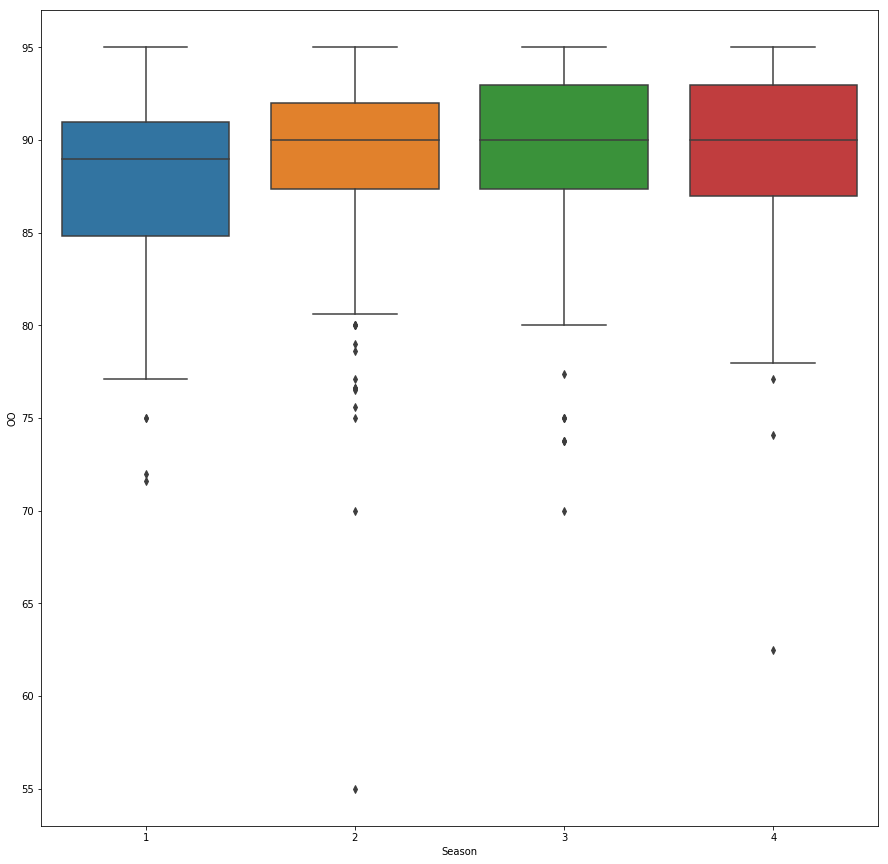

In [358]:
plt.figure(figsize=(15,15))
sns.boxplot(x='Season', y='OO', data=dataset_1)
plt.show()

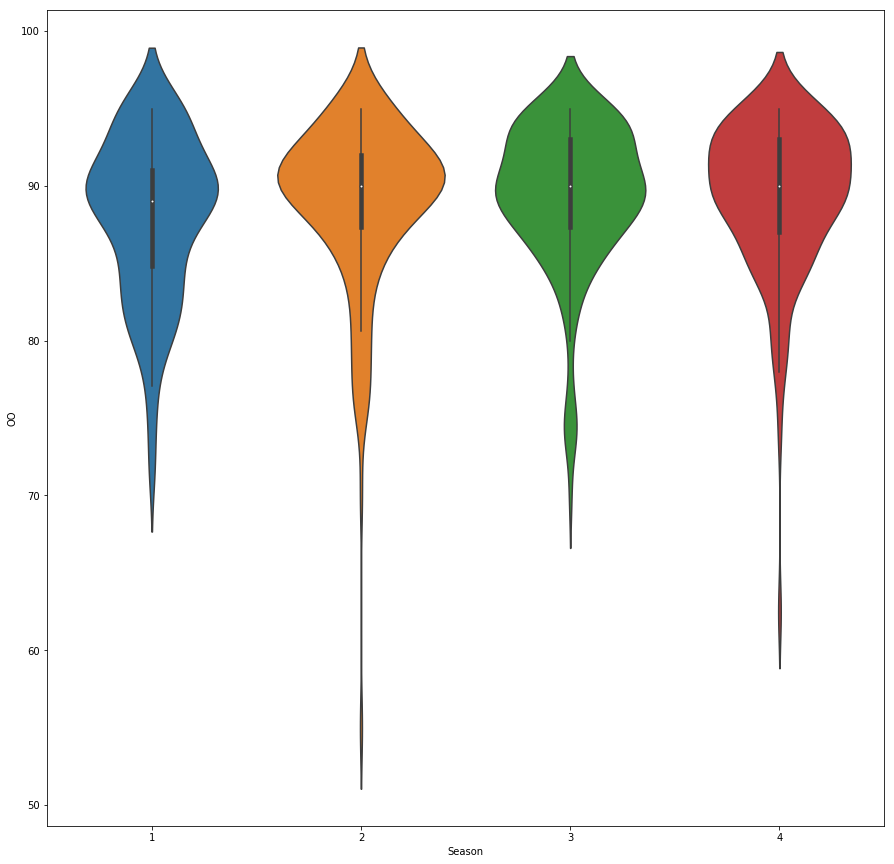

In [359]:
plt.figure(figsize=(15,15))
sns.violinplot(x='Season', y='OO', data=dataset_1)
plt.show()

## HG vs Y

C:\Users\Danny\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


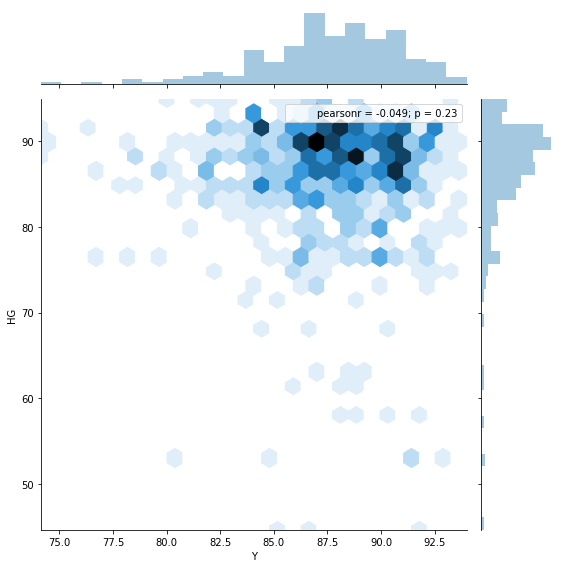

In [360]:
sns.jointplot(x='Y', y='HG', data=dataset_1, kind='hex', size=8)

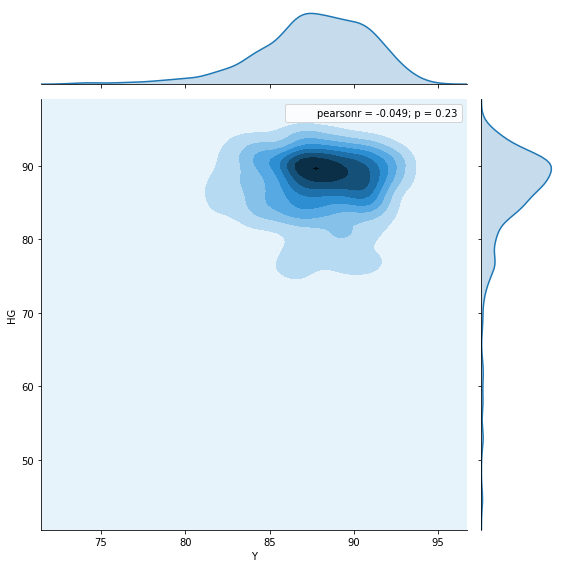

In [361]:
sns.jointplot(x='Y', y='HG', data=dataset_1, kind='kde', size=8)

## HG vs Season

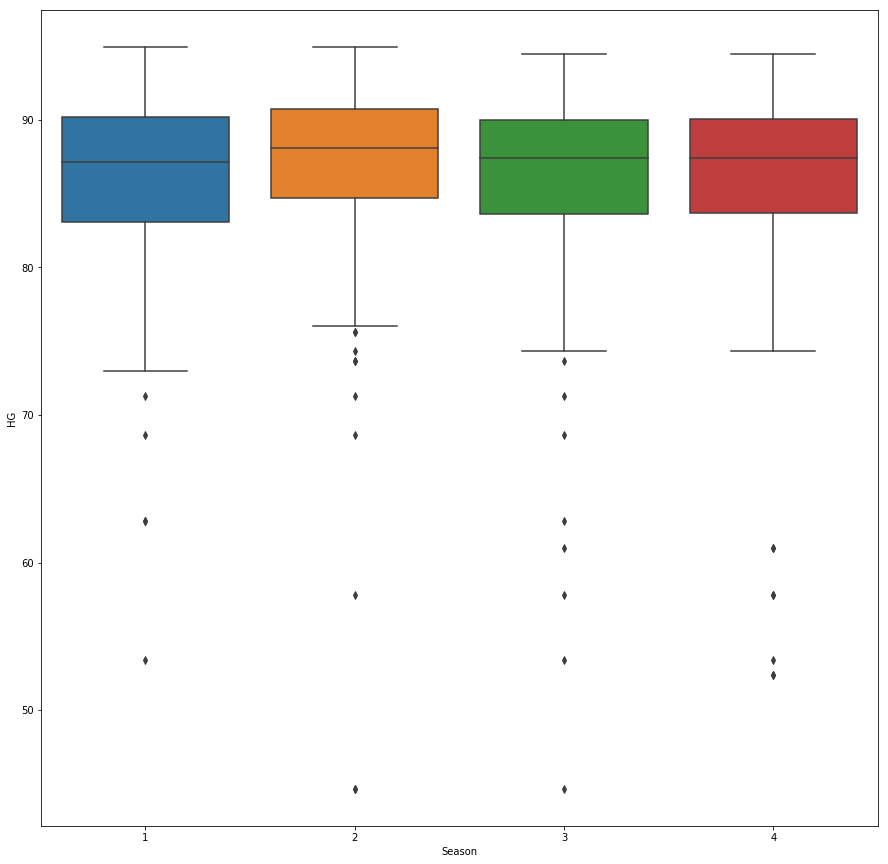

In [362]:
plt.figure(figsize=(15,15))
sns.boxplot(x='Season', y='HG', data=dataset_1)
plt.show()

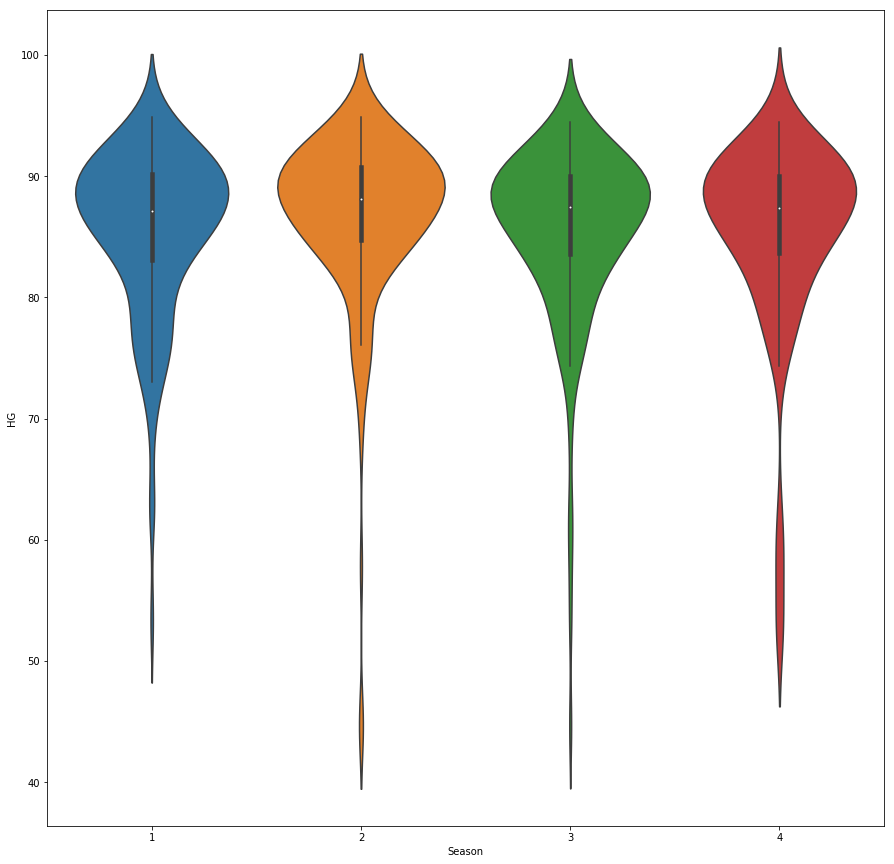

In [363]:
plt.figure(figsize=(15,15))
sns.violinplot(x='Season', y='HG', data=dataset_1)
plt.show()

## B vs League/Division

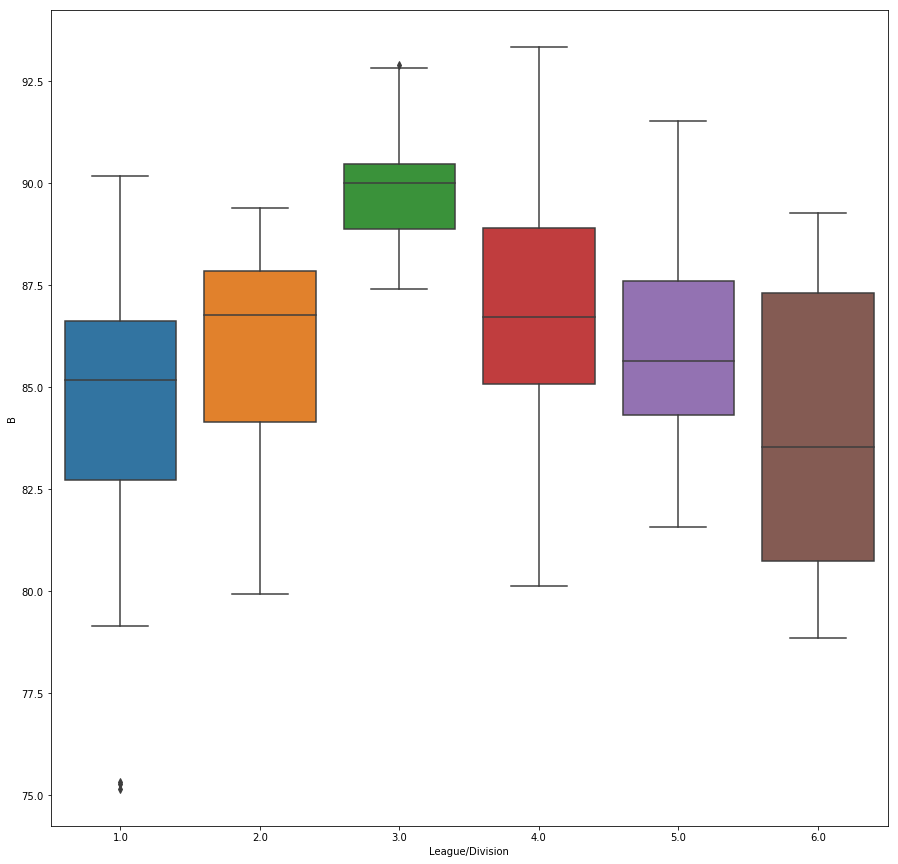

In [364]:
plt.figure(figsize=(15,15))
sns.boxplot(x='League/Division', y='B', data=dataset_1_missing)
plt.show()

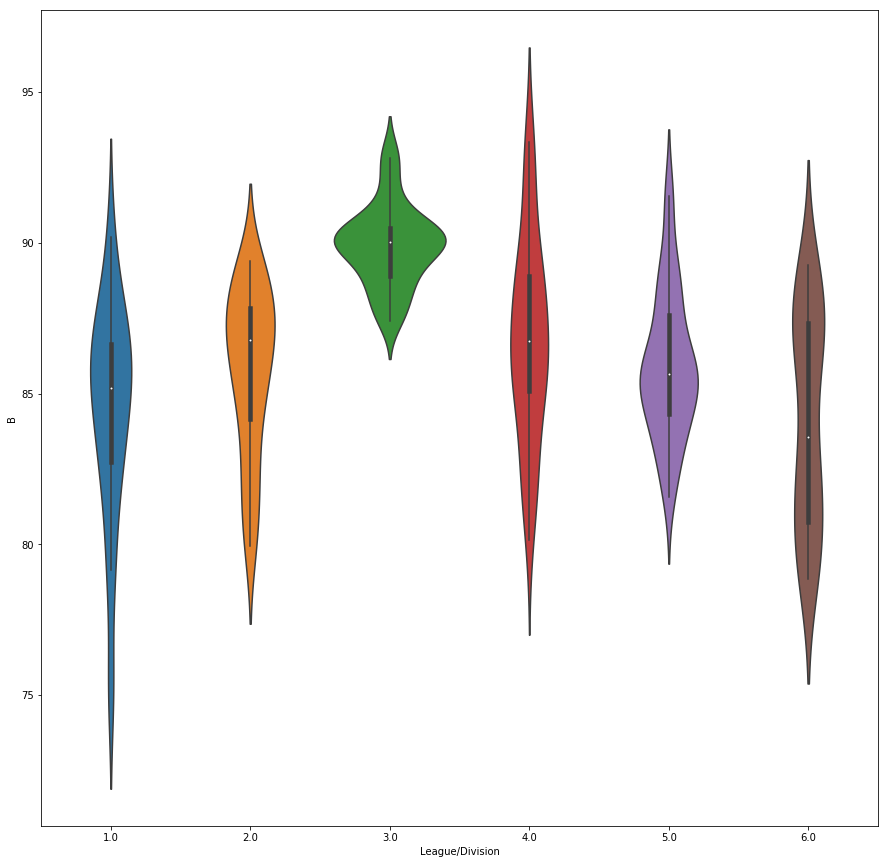

In [365]:
plt.figure(figsize=(15,15))
sns.violinplot(x='League/Division', y='B', data=dataset_1_missing)
plt.show()

## B vs Season

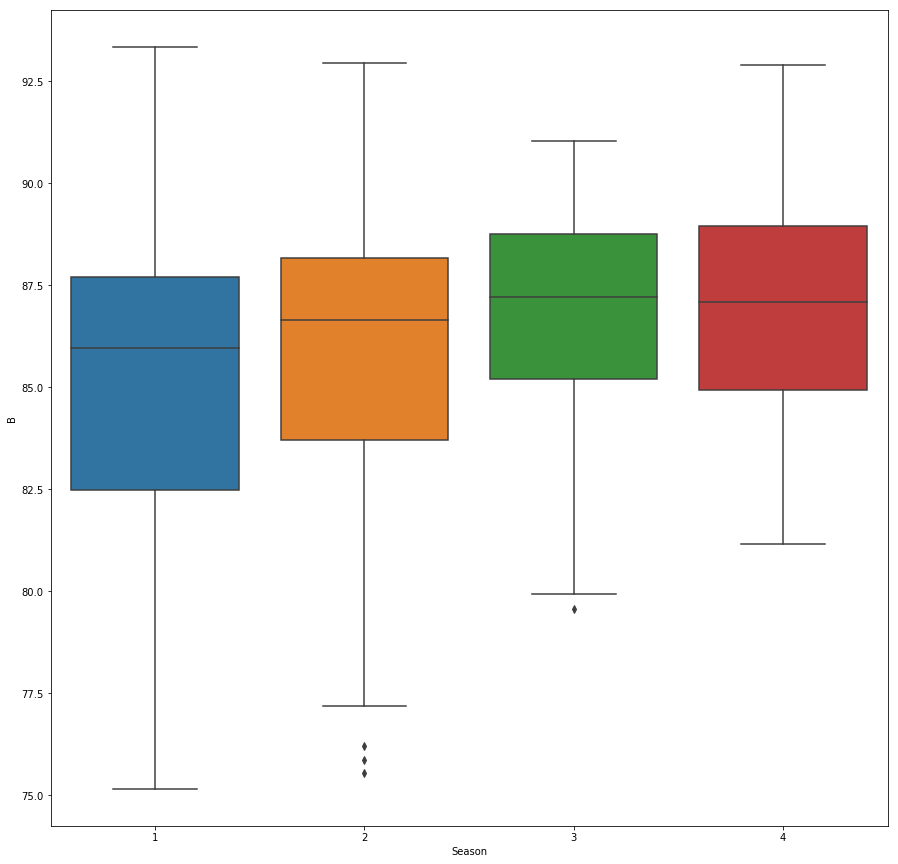

In [366]:
plt.figure(figsize=(15,15))
sns.boxplot(x='Season', y='B', data=dataset_1)
plt.show()

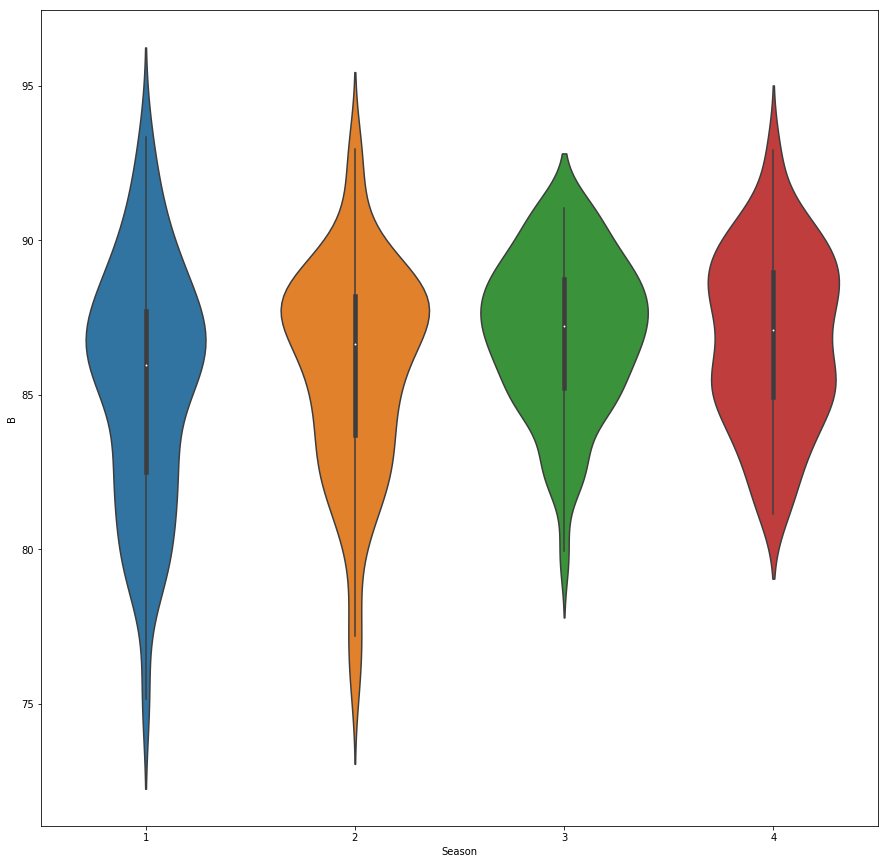

In [367]:
plt.figure(figsize=(15,15))
sns.violinplot(x='Season', y='B', data=dataset_1)
plt.show()

---
# Part 1: Dataset 2
Fill missing data in performance metrics (G to CD)

In [368]:
dataset_2 = dataset_2_missing.fillna(dataset_2_missing.mean()['A':'ZZ'])

## LM vs Head Coach

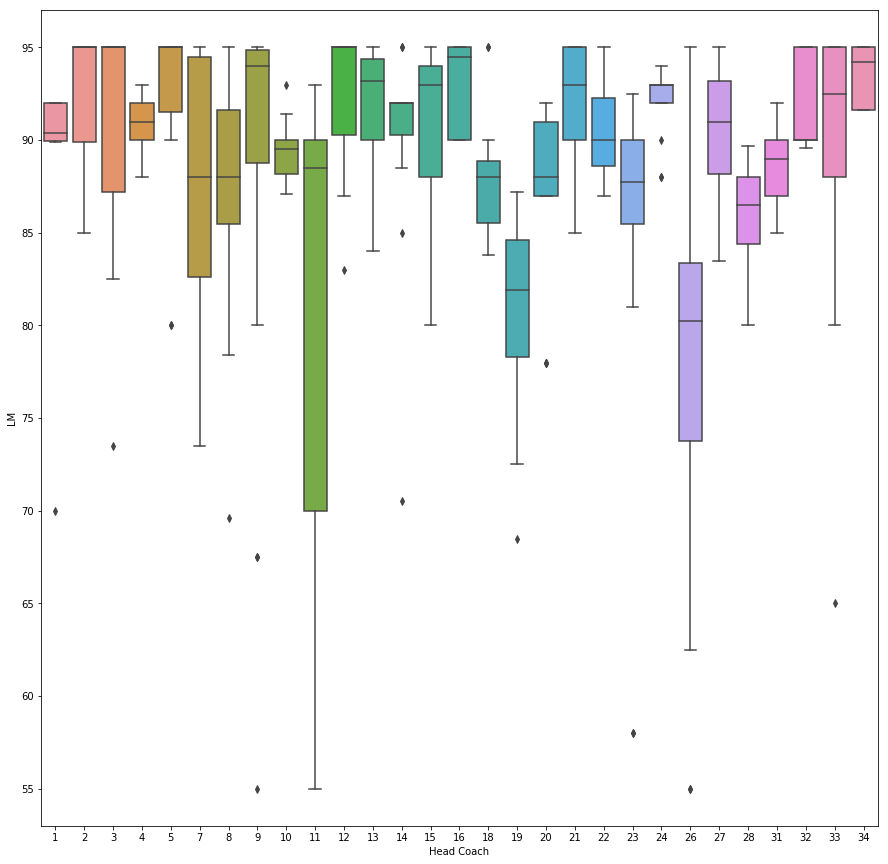

In [369]:
plt.figure(figsize=(15,15))
sns.boxplot(x='Head Coach', y='LM', data=dataset_2)
plt.show()

## PQ vs Manager

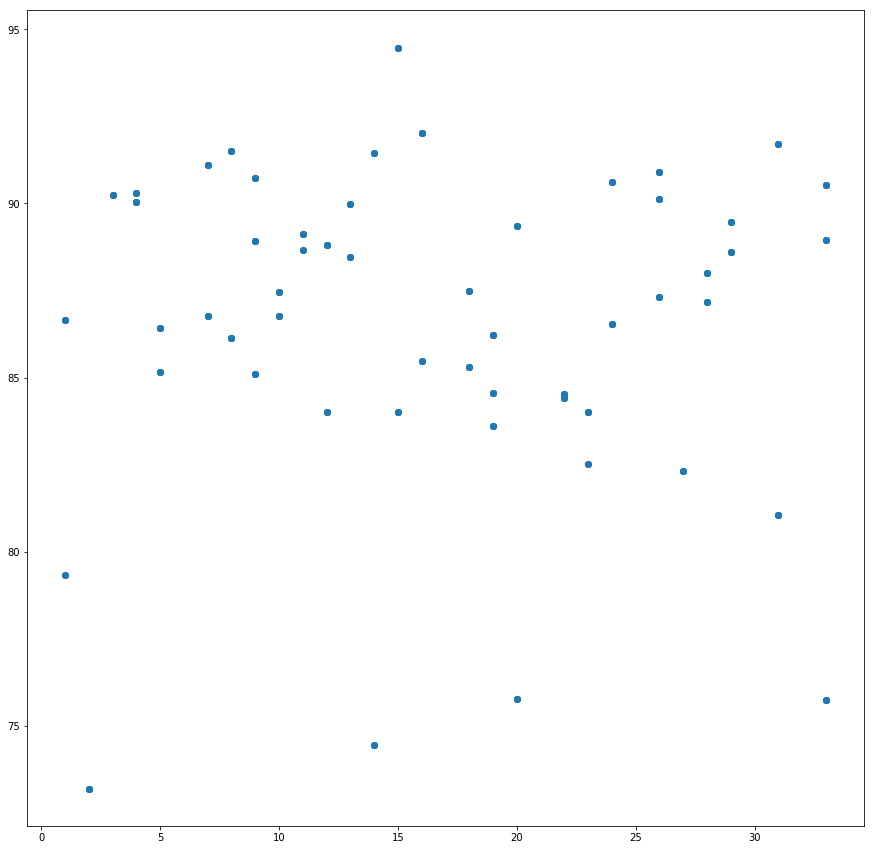

In [370]:
plt.figure(figsize=(15,15))
plt.scatter(x=dataset_2['Manager'], y=dataset_2['PQ'])
plt.show()

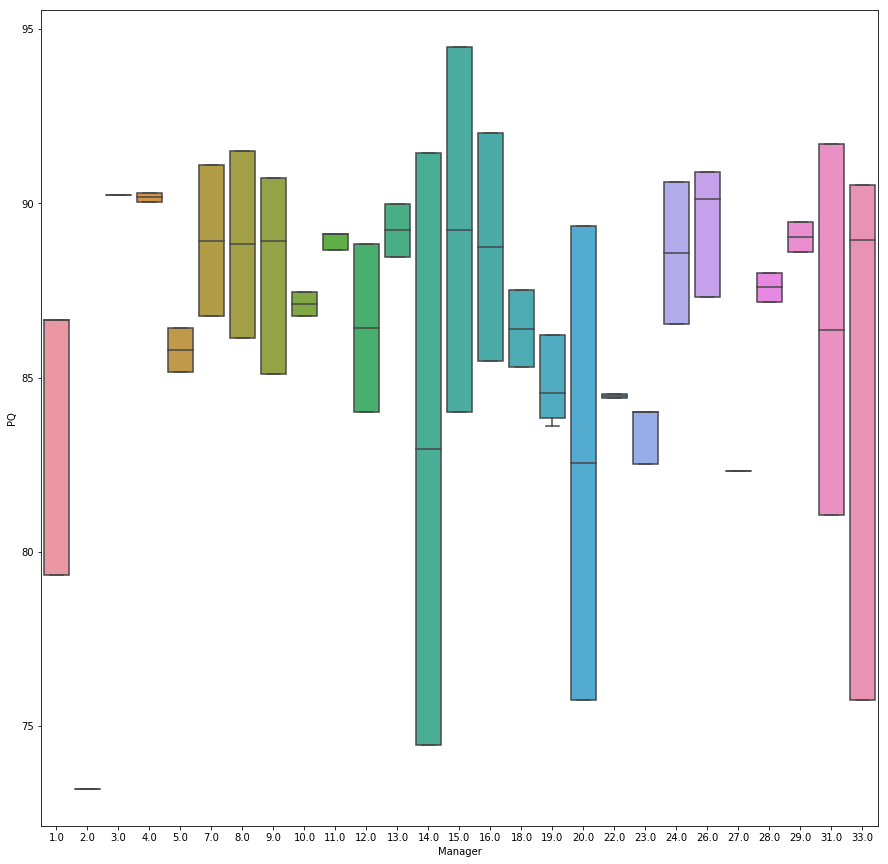

In [371]:
plt.figure(figsize=(15,15))
sns.boxplot(x='Manager', y='PQ', data=dataset_2)
plt.show()

## PQ vs Season

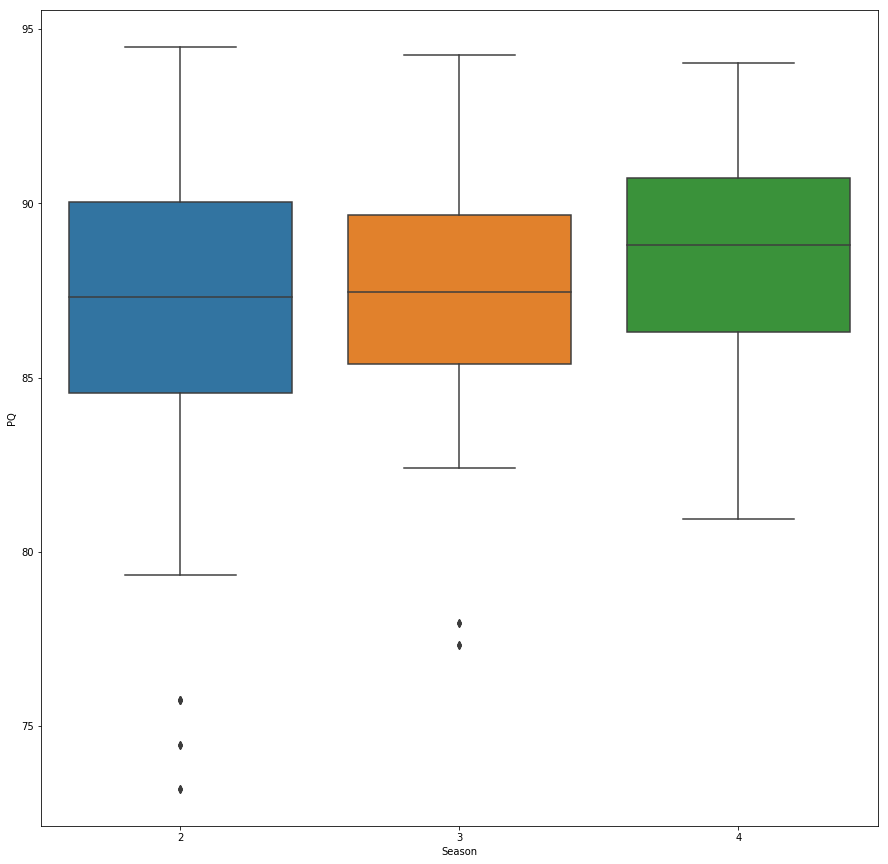

In [372]:
plt.figure(figsize=(15,15))
sns.boxplot(x='Season', y='PQ', data=dataset_2)
plt.show()

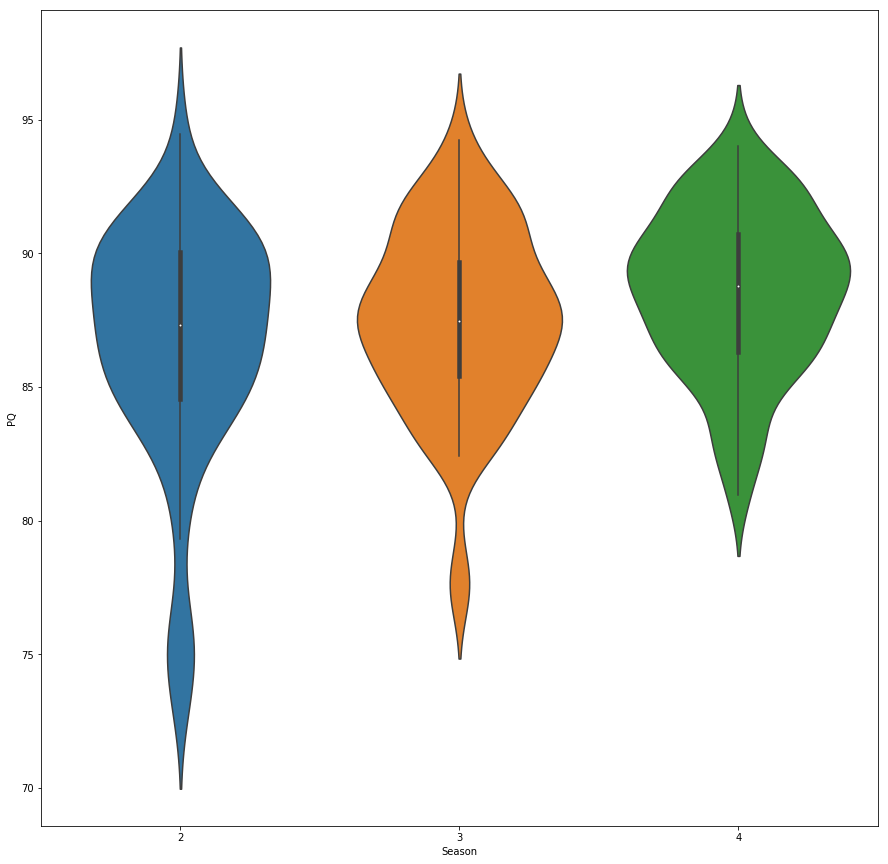

In [373]:
plt.figure(figsize=(15,15))
sns.violinplot(x='Season', y='PQ', data=dataset_2)
plt.show()

## OO vs Head Coach

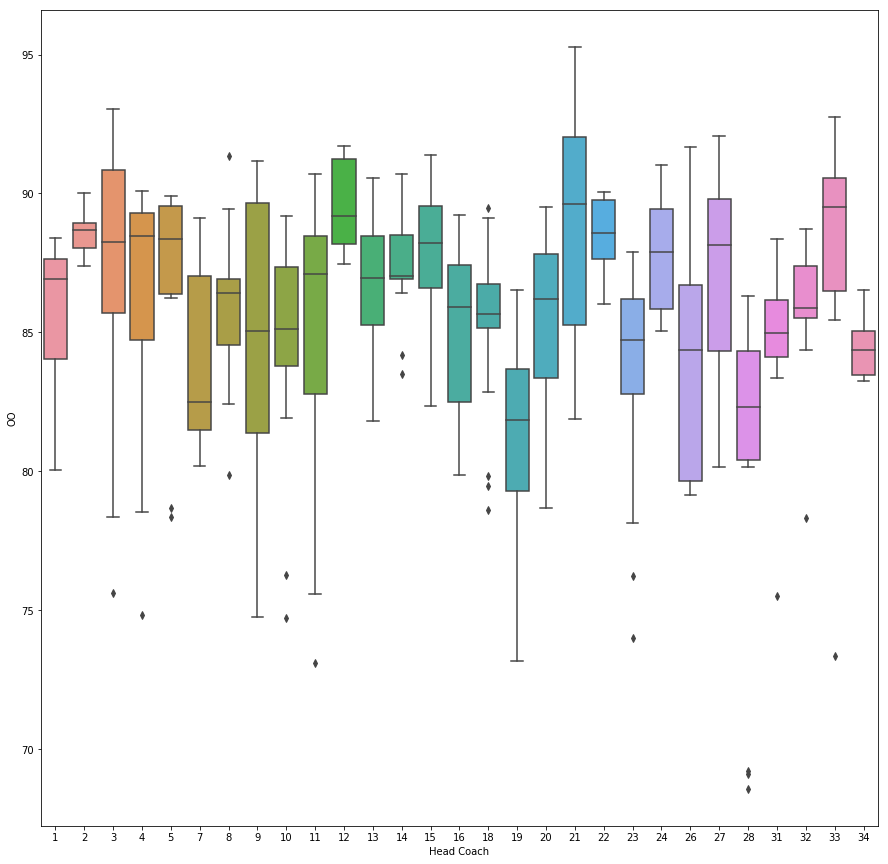

In [374]:
plt.figure(figsize=(15,15))
sns.boxplot(x='Head Coach', y='OO', data=dataset_2)
plt.show()

## OO vs Season

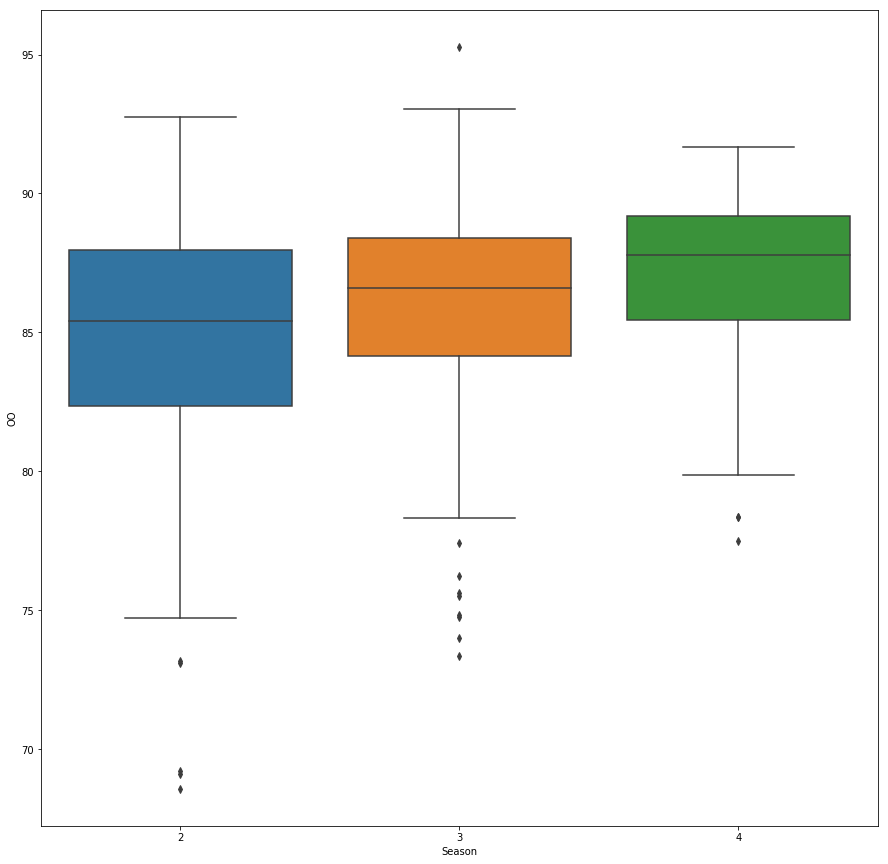

In [375]:
plt.figure(figsize=(15,15))
sns.boxplot(x='Season', y='OO', data=dataset_2)
plt.show()

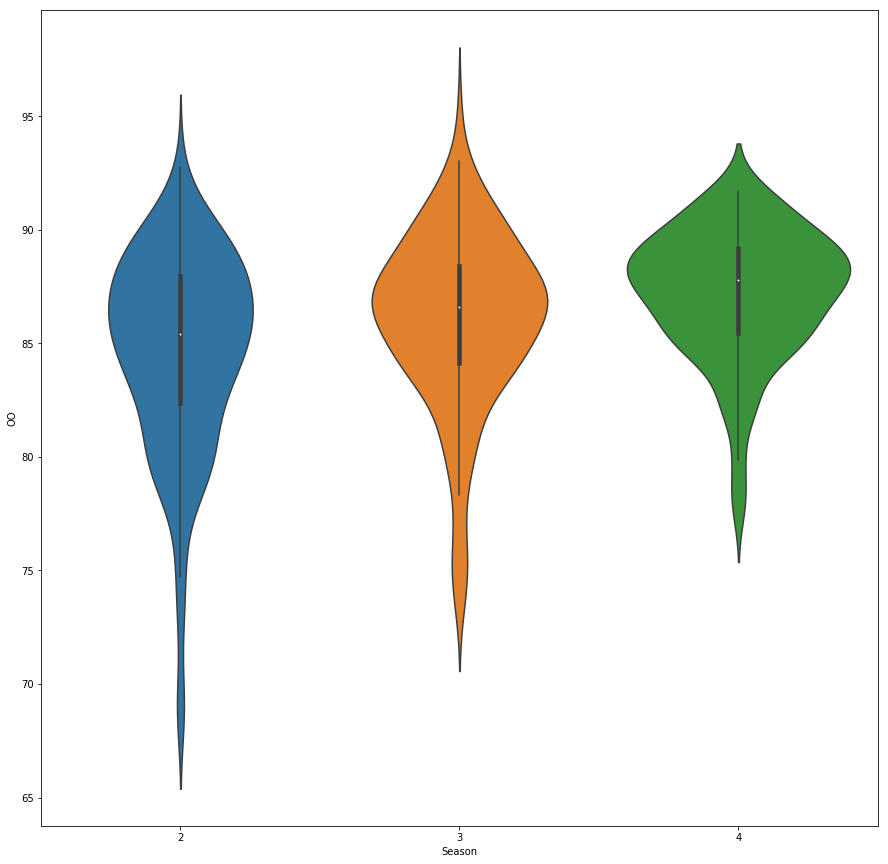

In [376]:
plt.figure(figsize=(15,15))
sns.violinplot(x='Season', y='OO', data=dataset_2)
plt.show()

## BC vs LM

C:\Users\Danny\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


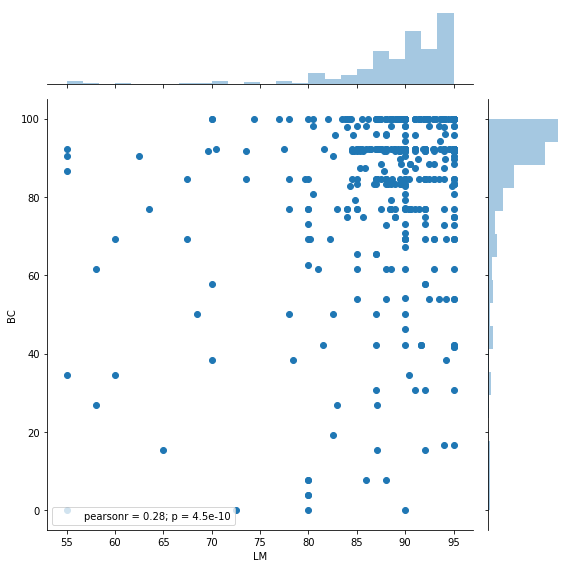

In [377]:
sns.jointplot(x='LM', y='BC', data=dataset_2, kind='scatter', size=8)

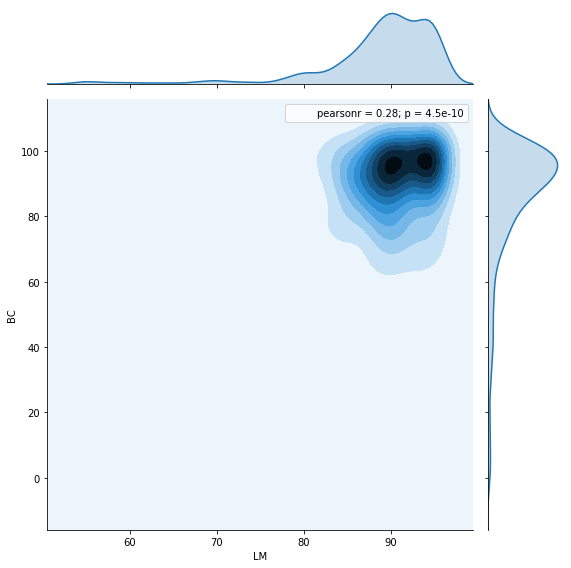

In [378]:
sns.jointplot(x='LM', y='BC', data=dataset_2, kind='kde', size=8)

## BC vs Season

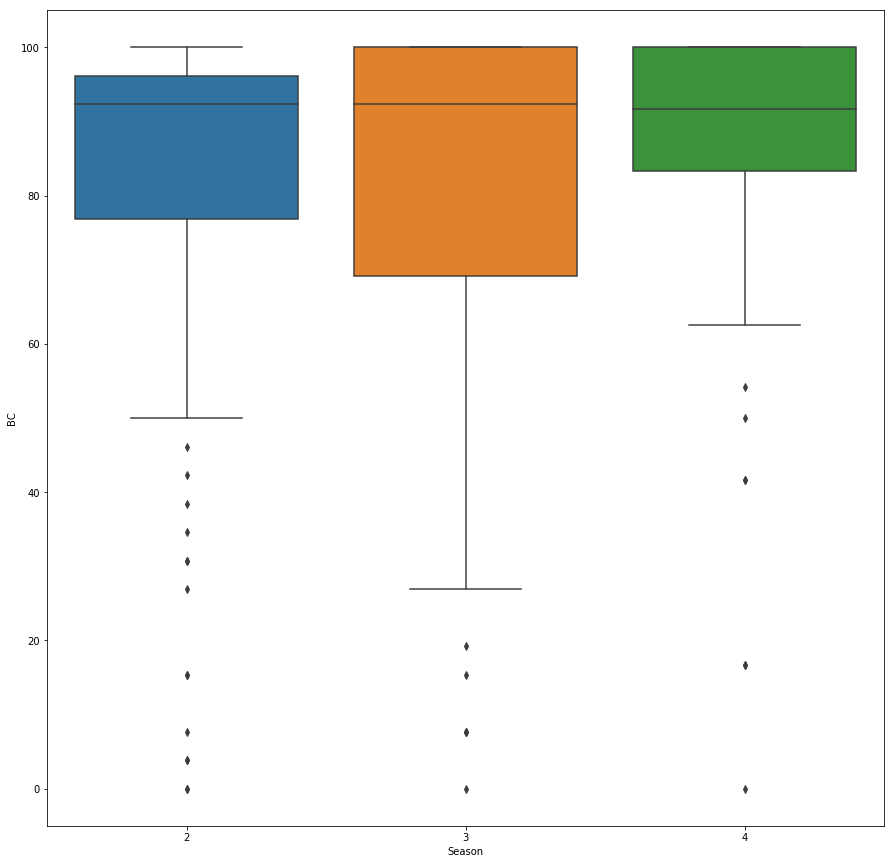

In [379]:
plt.figure(figsize=(15,15))
sns.boxplot(x='Season', y='BC', data=dataset_2)
plt.show()

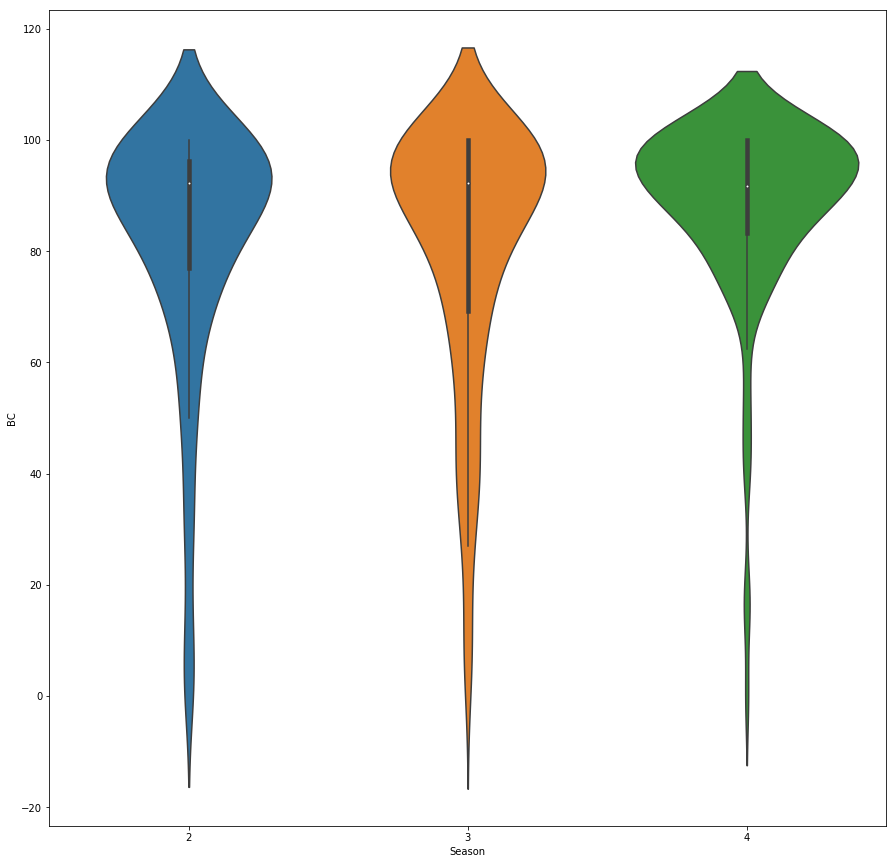

In [380]:
plt.figure(figsize=(15,15))
sns.violinplot(x='Season', y='BC', data=dataset_2)
plt.show()

## LM vs HH

C:\Users\Danny\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


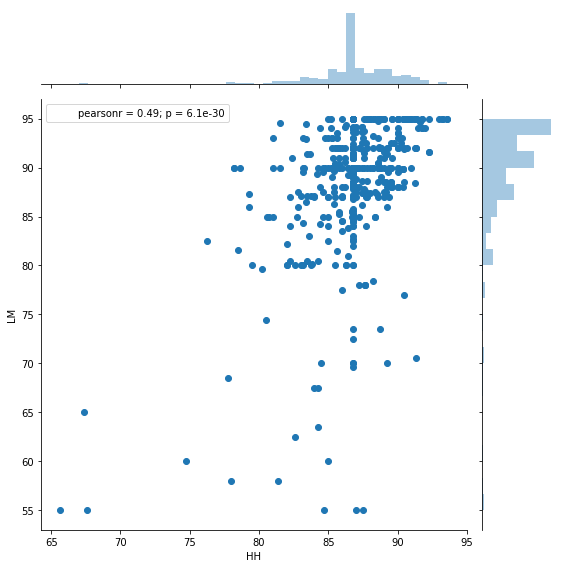

In [381]:
sns.jointplot(x='HH', y='LM', data=dataset_2, kind='scatter', size=8)

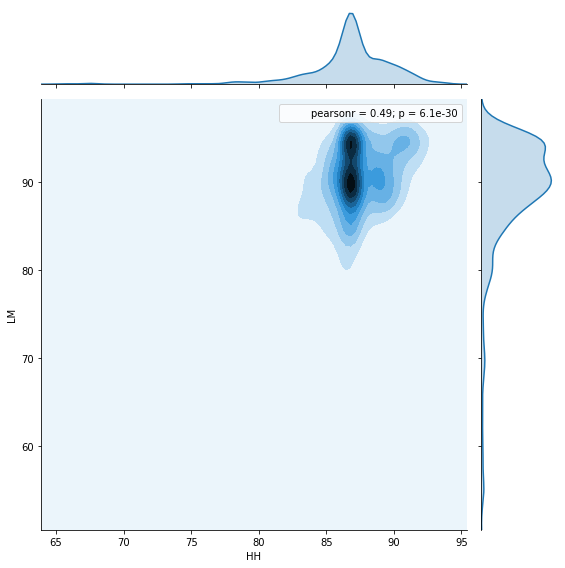

In [382]:
sns.jointplot(x='HH', y='LM', data=dataset_2, kind='kde', size=8)

## LM vs Season

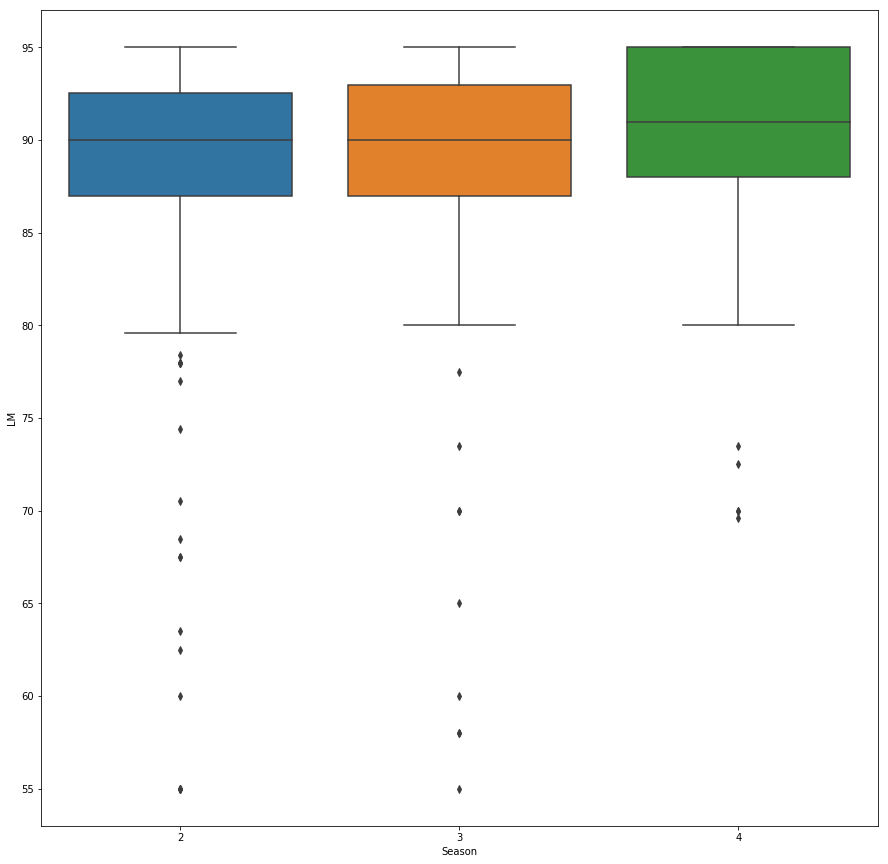

In [383]:
plt.figure(figsize=(15,15))
sns.boxplot(x='Season', y='LM', data=dataset_2)
plt.show()

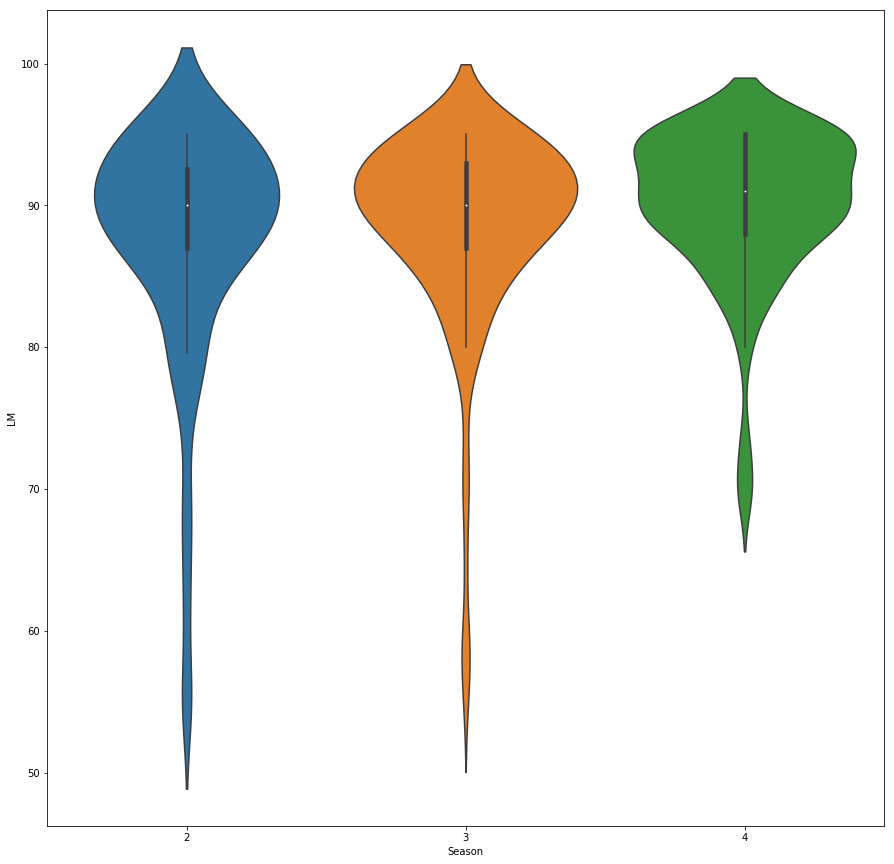

In [384]:
plt.figure(figsize=(15,15))
sns.violinplot(x='Season', y='LM', data=dataset_2)
plt.show()

## EF vs League/Division

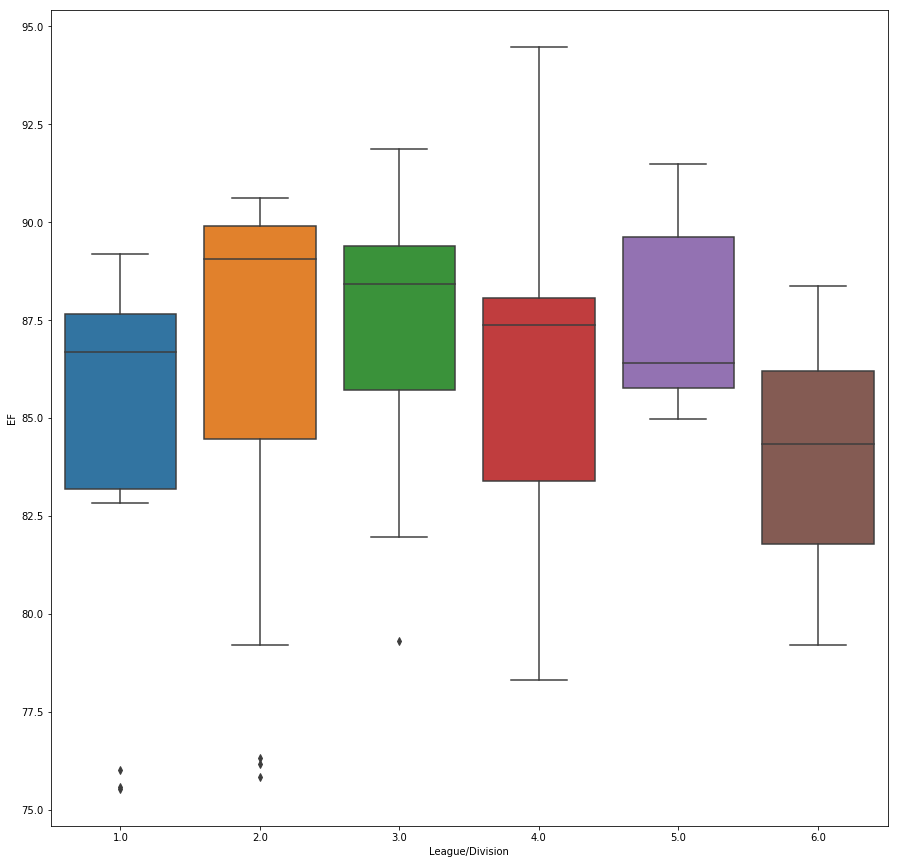

In [385]:
plt.figure(figsize=(15,15))
sns.boxplot(x='League/Division', y='EF', data=dataset_2_missing)
plt.show()

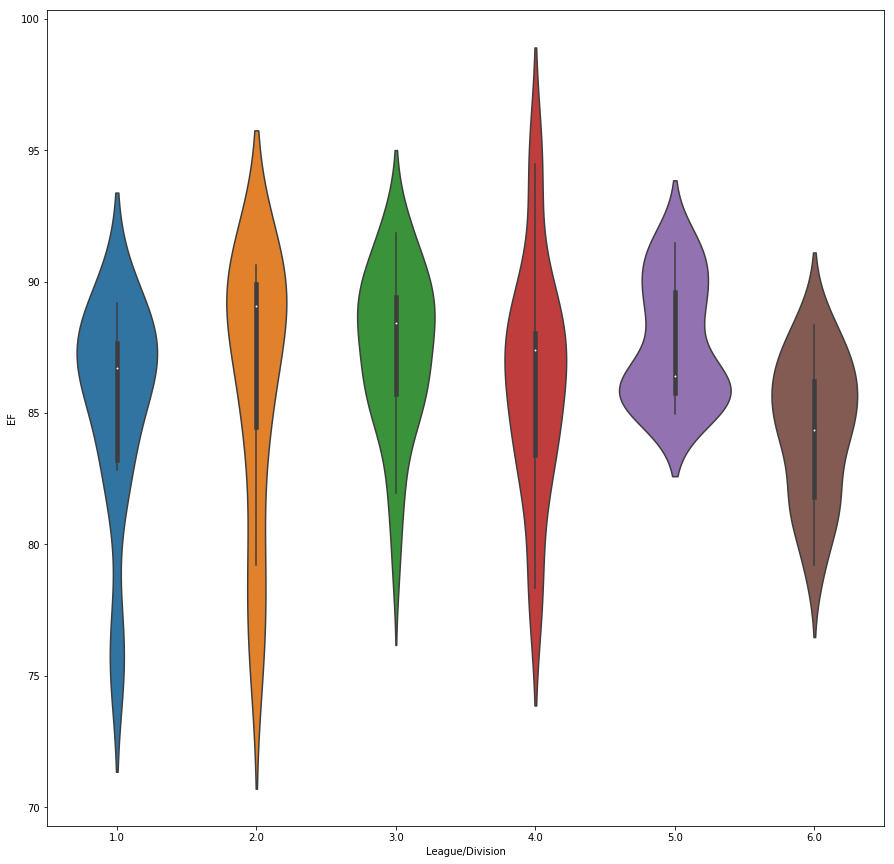

In [386]:
plt.figure(figsize=(15,15))
sns.violinplot(x='League/Division', y='EF', data=dataset_2_missing)
plt.show()

## EF vs Season

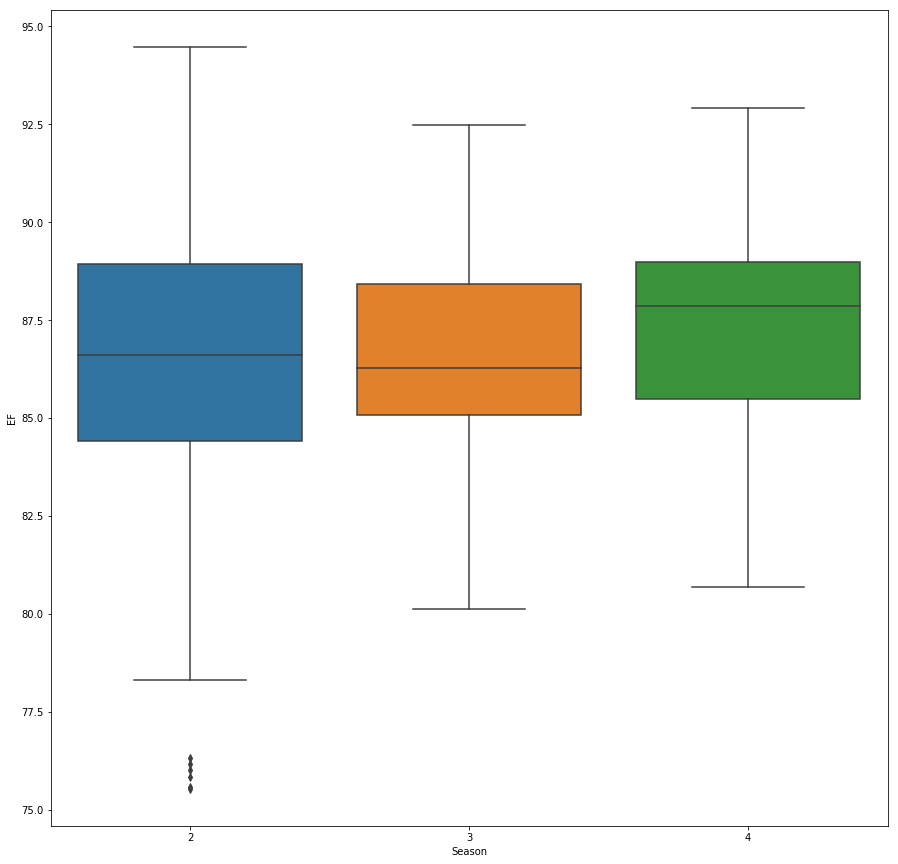

In [387]:
plt.figure(figsize=(15,15))
sns.boxplot(x='Season', y='EF', data=dataset_2)
plt.show()

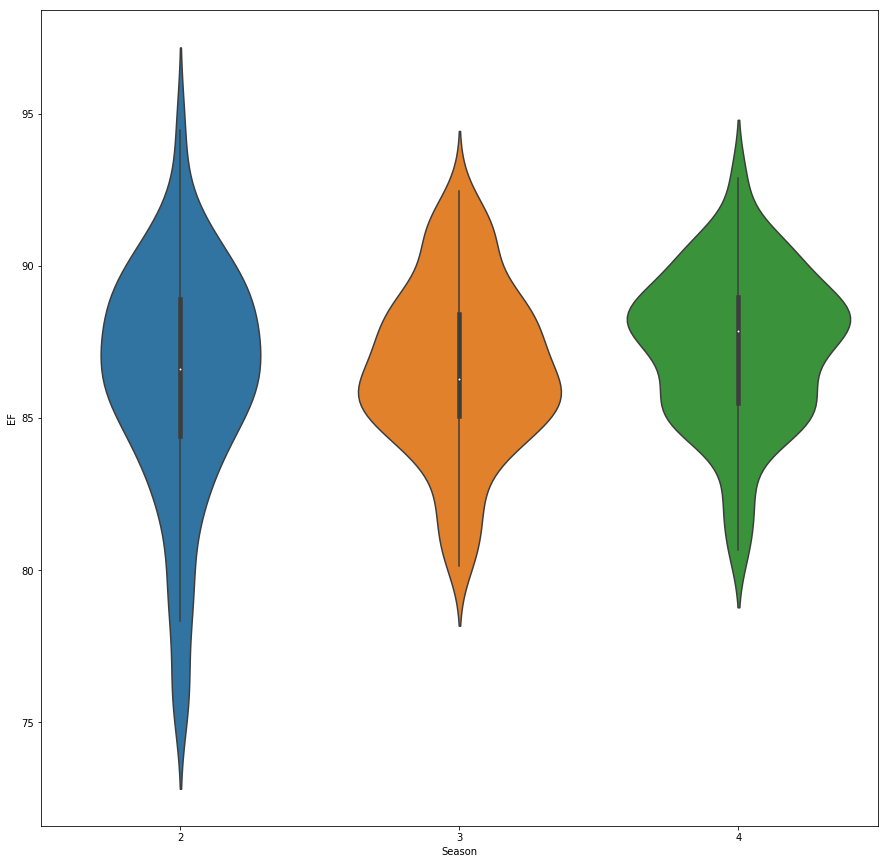

In [388]:
plt.figure(figsize=(15,15))
sns.violinplot(x='Season', y='EF', data=dataset_2)
plt.show()

# Part 2: Dataset 1

## Predicting R

#### Splitting into training set and test set

In [389]:
X_train, X_test, y_train, y_test = train_test_split(dataset_1[['Head Coach','B','S','HG','HH','OO']],dataset_1['R'],\
                                                    test_size=0.2, random_state=42)

#### Trying Linear Regressor

In [390]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [391]:
y_pred = regressor.predict(X_test)

In [393]:
r2_score(y_test, y_pred)

0.7253012633063787

#### Try Polynomial Regressor

In [394]:
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [395]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [396]:
y_pred = lin_reg.predict(poly_reg.fit_transform(X_test))

In [397]:
r2_score(y_test, y_pred)

0.696754031116217

#### Try Decision Tree Regressor

In [398]:
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [399]:
y_pred = regressor.predict(X_test)

In [400]:
r2_score(y_test, y_pred)

0.4674552856754488

#### Try Support Vector Regressor

In [330]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(dataset_1[['Head Coach','B','S','HG','HH','OO']])
y = sc_y.fit_transform(dataset_1['R'].values.reshape(dataset_1['R'].shape[0],-1)).reshape(dataset_1['R'].shape)

#X = normalize(dataset_1[['Head Coach','B','S','HG','HH','OO']])
#y = normalize(dataset_1['R'].values.reshape(dataset_1['R'].shape[0],-1), norm='max', axis=0).reshape(dataset_1['R'].shape)

X_train, X_test, y_train, y_test = train_test_split(X, y,\
                                                    test_size=0.2, random_state=42)

In [331]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred)
y_test = sc_y.inverse_transform(y_test)

In [332]:
r2_score(y_test, y_pred)

0.6242479372697762

## Predicting OO

#### Splitting into train set and test set

In [401]:
X_train, X_test, y_train, y_test = train_test_split(dataset_1[['Head Coach','C','JI','NN']],dataset_1['OO'],\
                                                    test_size=0.2, random_state=42)

#### Try Linear Regressor

In [402]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [403]:
y_pred = regressor.predict(X_test)

In [404]:
r2_score(y_test, y_pred)

0.19542002109353895

#### Try Polynomial Regressor

In [421]:
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [422]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [423]:
y_pred = lin_reg.predict(poly_reg.fit_transform(X_test))

In [424]:
r2_score(y_test, y_pred)

0.24927386573272348

#### Try Decision Tree Regressor

In [425]:
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [426]:
y_pred = regressor.predict(X_test)

In [429]:
r2_score(y_test, y_pred)

-0.23337392195468998

#### Try Support Vector Regressor

In [430]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(dataset_1[['Head Coach','B','S','HG','HH','OO']])
y = sc_y.fit_transform(dataset_1['R'].values.reshape(dataset_1['R'].shape[0],-1)).reshape(dataset_1['R'].shape)

#X = normalize(dataset_1[['Head Coach','B','S','HG','HH','OO']])
#y = normalize(dataset_1['R'].values.reshape(dataset_1['R'].shape[0],-1), norm='max', axis=0).reshape(dataset_1['R'].shape)

X_train, X_test, y_train, y_test = train_test_split(X, y,\
                                                    test_size=0.2, random_state=42)

In [431]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred)
y_test = sc_y.inverse_transform(y_test)

In [432]:
r2_score(y_test, y_pred)

0.6242479372697762

## Predicting Y

#### Splitting into train set and test set

#### Try Linear Regressor

#### Try Polynomial Regressor

#### Try Decision Tree Regressor

#### Try Support Vector Regressor

# Part 2: Data Set 2

## Predicting OO

#### Splitting into train set and test set

#### Try Linear Regressor

#### Try Polynomial Regressor

#### Try Decision Tree Regressor

#### Try Support Vector Regressor

## Predicting LM

#### Splitting into train set and test set

#### Try Linear Regressor

#### Try Polynomial Regressor

#### Try Decision Tree Regressor

#### Try Support Vector Regressor

## Predicting PQ

#### Splitting into train set and test set

#### Try Linear Regressor

#### Try Polynomial Regressor

#### Try Decision Tree Regressor

#### Try Support Vector Regressor